# Section 2-1 - Basic Neural Network - MNIST

In this section, we'll apply techniques developed so far on the MNIST dataset. The MNIST dataset consists of hand-drawn digits from zero to nine. Each image is 28 pixels in height and 28 pixels in width, with the pixel value an integer between 0 and 255.

In [1]:
import numpy as np
import pandas as pd
from itertools import izip
from sklearn.preprocessing import StandardScaler
from time import time

np.random.seed(1337)

df = pd.read_csv('data/mnist.csv')

For illustrative purposes, the first example is shown with pixel values between 0 and 10.

In [2]:
for item in df.iloc[0, 1:].values.reshape(28,28)/26:
    print ''.join(str(list(item)).split(' '))

[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,9,3,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,9,9,3,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,9,9,6,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,9,9,8,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,9,9,2,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8,9,9,3,0,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,9,9,9,6,0,0,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,9,9,6,0,0,0,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,0,8,9,9,9,3,0,0,0,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,1,9,9,9,0,0,0,0,0,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,0,7,9,9,7,0,0,0,0,0,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,6,9,9,7,0,0,0,0,0,0,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0,0,0,0,0,7,9,9,2,0,0,0,0,0,0,0,0,0,0,0,0,0]
[0,0,0,0,0,0,0

A hand-drawn 1 can clearly be seen from the visualization in grayscale.

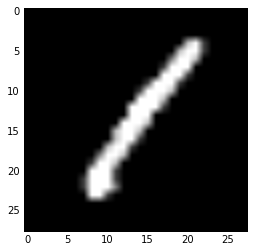

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(df.iloc[0, 1:].values.reshape(28,28), cmap=plt.get_cmap('gray', 5))
plt.show()

There are 42,000 images. We similarly split the images 80:20 into training and test sets, and scale the data through division by 255. 

In [4]:
df_train = df.iloc[:33600, :]

X_train = df_train.iloc[:, 1:].values / 255.
y_train = df_train['label'].values
y_train_onehot = pd.get_dummies(df_train['label']).values

In [5]:
df_test = df.iloc[33600:, :]

X_test = df_test.iloc[:, 1:].values / 255.
y_test = df_test['label'].values

## Benchmark

In [6]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0, verbose=3)
model = model.fit(X_train, df_train['label'].values)

y_prediction = model.predict(X_test)
print "\naccuracy", np.sum(y_prediction == df_test['label'].values) / float(len(y_test))

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10

accuracy 0.937857142857


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


## 1-layer Neural Network

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation

start = time()

model = Sequential()
model.add(Dense(input_dim=784, output_dim=10))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X_train, y_train_onehot)

print '\ntime taken %s seconds' % str(time() - start)

Using TensorFlow backend.


Epoch 1/10
33600/33600 [==============================] - 2s - loss: 0.9613 - acc: 0.7711     
Epoch 2/10
33600/33600 [==============================] - 2s - loss: 0.5371 - acc: 0.8657     
Epoch 3/10
33600/33600 [==============================] - 2s - loss: 0.4598 - acc: 0.8792     
Epoch 4/10
33600/33600 [==============================] - 2s - loss: 0.4217 - acc: 0.8865     
Epoch 5/10
33600/33600 [==============================] - 2s - loss: 0.3980 - acc: 0.8921     
Epoch 6/10
33600/33600 [==============================] - 2s - loss: 0.3814 - acc: 0.8956     
Epoch 7/10
33600/33600 [==============================] - 2s - loss: 0.3689 - acc: 0.8991     
Epoch 8/10
33600/33600 [==============================] - 2s - loss: 0.3589 - acc: 0.9014     
Epoch 9/10
33600/33600 [==============================] - 2s - loss: 0.3508 - acc: 0.9037     
Epoch 10/10
33600/33600 [==============================] - 2s - loss: 0.3440 - acc: 0.9052     

time taken 23.0311410427 seconds


In [8]:
y_prediction = model.predict_classes(X_test)
print "\n\naccuracy", np.sum(y_prediction == y_test) / float(len(y_test))

8352/8400 [============================>.] - ETA: 0s

accuracy 0.905714285714


## 2-layer Neural Network

In [9]:
start = time()

model = Sequential()
model.add(Dense(input_dim=784, output_dim=100))
model.add(Dense(output_dim=10))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X_train, y_train_onehot)

print '\ntime taken %s seconds' % str(time() - start)

Epoch 1/10
33600/33600 [==============================] - 2s - loss: 0.7038 - acc: 0.8191     
Epoch 2/10
33600/33600 [==============================] - 3s - loss: 0.3942 - acc: 0.8907     
Epoch 3/10
33600/33600 [==============================] - 2s - loss: 0.3498 - acc: 0.9021     
Epoch 4/10
33600/33600 [==============================] - 2s - loss: 0.3287 - acc: 0.9065     
Epoch 5/10
33600/33600 [==============================] - 2s - loss: 0.3153 - acc: 0.9097     
Epoch 6/10
33600/33600 [==============================] - 2s - loss: 0.3056 - acc: 0.9132     
Epoch 7/10
33600/33600 [==============================] - 3s - loss: 0.2985 - acc: 0.9157     
Epoch 8/10
33600/33600 [==============================] - 3s - loss: 0.2927 - acc: 0.9175     
Epoch 9/10
33600/33600 [==============================] - 3s - loss: 0.2881 - acc: 0.9182     
Epoch 10/10
33600/33600 [==============================] - 3s - loss: 0.2840 - acc: 0.9195     

time taken 30.7171339989 seconds


In [10]:
y_prediction = model.predict_classes(X_test)
print "\n\naccuracy", np.sum(y_prediction == y_test) / float(len(y_test))

7904/8400 [===========================>..] - ETA: 0s

accuracy 0.918333333333


## 3-layer Neural Network

In [11]:
start = time()

model = Sequential()
model.add(Dense(input_dim=784, output_dim=100))
model.add(Dense(output_dim=100))
model.add(Dense(output_dim=10))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X_train, y_train_onehot)

print '\ntime taken %s seconds' % str(time() - start)

Epoch 1/10
33600/33600 [==============================] - 3s - loss: 0.6125 - acc: 0.8334     
Epoch 2/10
33600/33600 [==============================] - 3s - loss: 0.3563 - acc: 0.8977     
Epoch 3/10
33600/33600 [==============================] - 3s - loss: 0.3230 - acc: 0.9073     
Epoch 4/10
33600/33600 [==============================] - 3s - loss: 0.3069 - acc: 0.9132     
Epoch 5/10
33600/33600 [==============================] - 3s - loss: 0.2963 - acc: 0.9151     
Epoch 6/10
33600/33600 [==============================] - 3s - loss: 0.2890 - acc: 0.9166     
Epoch 7/10
33600/33600 [==============================] - 3s - loss: 0.2827 - acc: 0.9187     
Epoch 8/10
33600/33600 [==============================] - 3s - loss: 0.2784 - acc: 0.9207     
Epoch 9/10
33600/33600 [==============================] - 3s - loss: 0.2739 - acc: 0.9217     
Epoch 10/10
33600/33600 [==============================] - 3s - loss: 0.2702 - acc: 0.9233     

time taken 35.4431540966 seconds


In [12]:
y_prediction = model.predict_classes(X_test)
print "\n\naccuracy", np.sum(y_prediction == y_test) / float(len(y_test))

8288/8400 [============================>.] - ETA: 0s

accuracy 0.919404761905


As in the previous section, we were able to drive loss down even further with additional layers. While we see improvements in accuracy, it's still not enough to beat the benchmark. We'll look into more advanced techniques to enhance model performance in next section.